In [1]:
# Install dependencies using pip in the docker container
# https://medium.com/@shivangisareen/for-anyone-using-jupyter-notebook-installing-packages-18a9468d0c1c
import sys
!{sys.executable} -m pip install plotly pandas dataclasses_json stylecloud jieba 
!{sys.executable} -m pip install -U kaleido
# Done with installation, so the following code will be clean (without the dependencies output, and re-running all the time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 10.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 11.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.6/363.6 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 KB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stylecloud: filename=stylec

In [7]:
from IPython.display import Image

# To run after editing, use shift+enter

##############################################################################################################

# import data structure
# coding

from cmath import sin
import customdatatypes
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# gosh this comment saves lives
import plotly.io as pio
pio.renderers.default = "iframe" # https://github.com/plotly/plotly.py/issues/2508#issuecomment-907338746

import os
import stylecloud
import jieba

# Plot 
def show_image(path: str):
    display(Image(filename=f"{path}"))

# Load data
english_singer_names = [
    "Taylor Swift",
    "Justin Bieber",
    "Sia",
    "Miley Cyrus",
]

chinese_singer_names = [
    "Jay Chou",
    "JJ Lin",
]

english_singers = []
for singer_name in english_singer_names:
    with open(f'data/{singer_name}.json', 'r') as infile:
        singer = customdatatypes.Singer.from_json(infile.read())
        english_singers.append(singer)

chinese_singers = []
for singer_name in chinese_singer_names:
    with open(f'data/{singer_name}.json', 'r') as infile:
        singer = customdatatypes.Singer.from_json(infile.read())
        chinese_singers.append(singer)
        

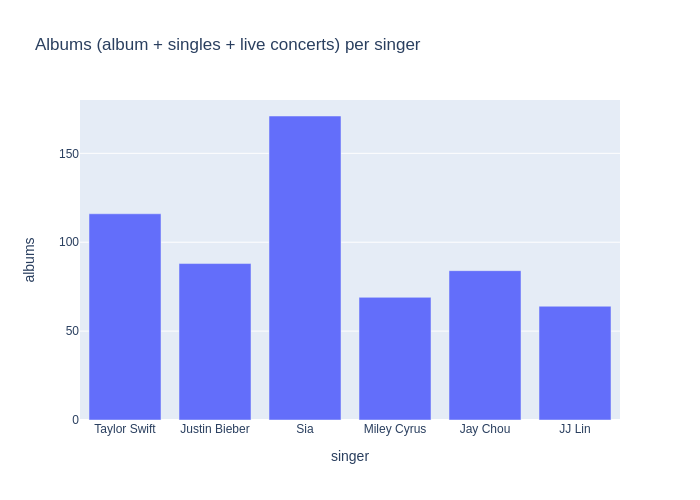

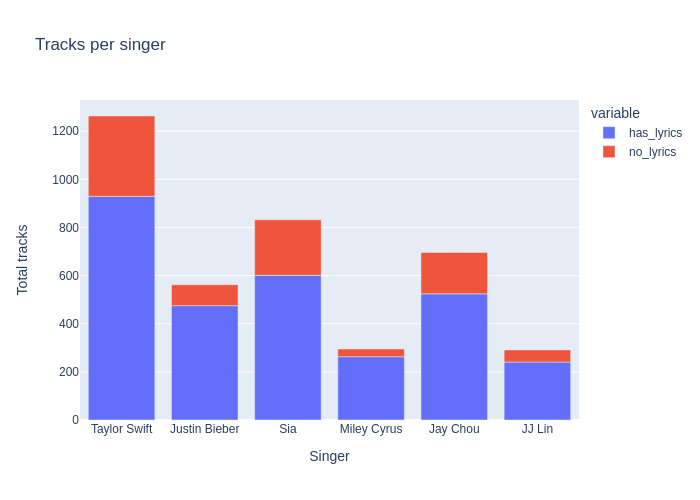

In [47]:
# data set basic data
def draw_album_info(singers: list[customdatatypes.Singer]): # bar chart
    singer_names = []
    album_count = []
    for singer in singers:
        singer_names.append(singer.name)
        album_count.append(len(singer.albums))
    
    dataframe = pd.DataFrame(dict(singer=singer_names, albums=album_count))
    fig = px.bar(dataframe, x=dataframe.singer, y=dataframe.albums, title="Albums (album + singles + live concerts) per singer")
    # fig.show()
    os.system(f"mkdir -p out/basics")
    fig.write_image(f"out/basics/singers.svg")
    
    # for jupyter, use png, due to performance reason
    fig.write_image(f"out/basics/singers.png")
    show_image(f"out/basics/singers.png")

def draw_track_and_lyrics_availbility(singers: list[customdatatypes.Singer]): # bar chart
    singer_names = []
    with_lyrics = []
    without_lyrics = []
    for singer in singers:
        singer_names.append(singer.name)
        tracks_with_lyrics = 0
        tracks_without_lyrics = 0
        for album in singer.albums:
            for track in album.tracks:
                if len(track.lyrics) == 0:
                    tracks_without_lyrics += 1
                else:
                    tracks_with_lyrics += 1
        with_lyrics.append(tracks_with_lyrics)
        without_lyrics.append(tracks_without_lyrics)
    
    dataframe = pd.DataFrame({'Singer': singer_names,
                               'has_lyrics': with_lyrics,
                               'no_lyrics': without_lyrics})    
    fig = px.bar(dataframe, x=dataframe.Singer, y=[dataframe.has_lyrics, dataframe.no_lyrics], title="Tracks per singer")
    fig.update_yaxes(title="Total tracks")
    # fig.show()
    os.system(f"mkdir -p out/basics")
    fig.write_image(f"out/basics/tracks.svg")
    
    # for jupyter, use png, due to performance reason
    fig.write_image(f"out/basics/tracks.png")
    show_image(f"out/basics/tracks.png")

draw_album_info(singers=english_singers + chinese_singers)
draw_track_and_lyrics_availbility(singers=english_singers + chinese_singers)

draw_audio_feature_of_all_songs_from_a_singer Taylor Swift


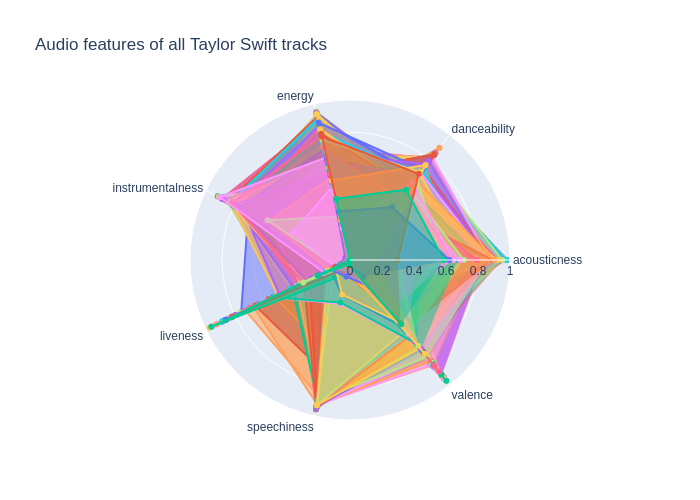

draw_audio_feature_of_all_songs_from_a_singer Justin Bieber


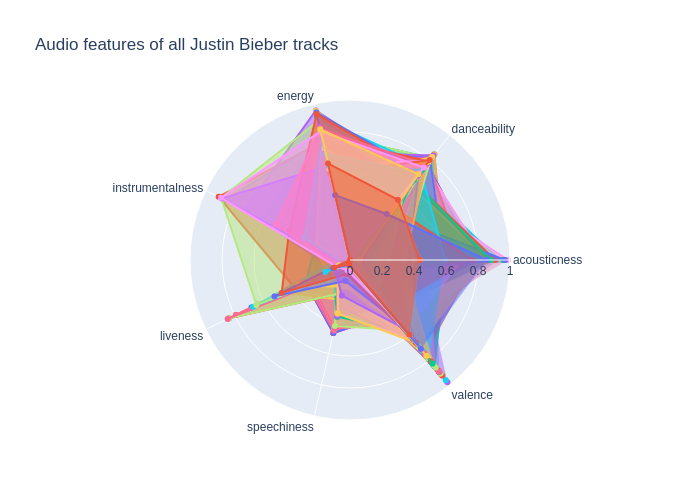

draw_audio_feature_of_all_songs_from_a_singer Sia


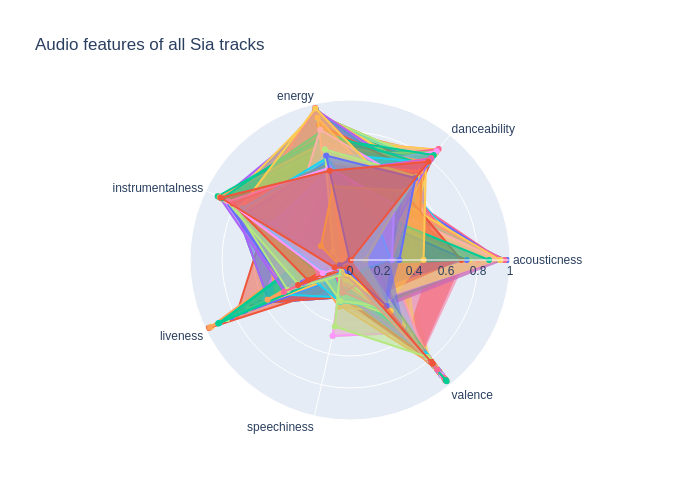

draw_audio_feature_of_all_songs_from_a_singer Miley Cyrus


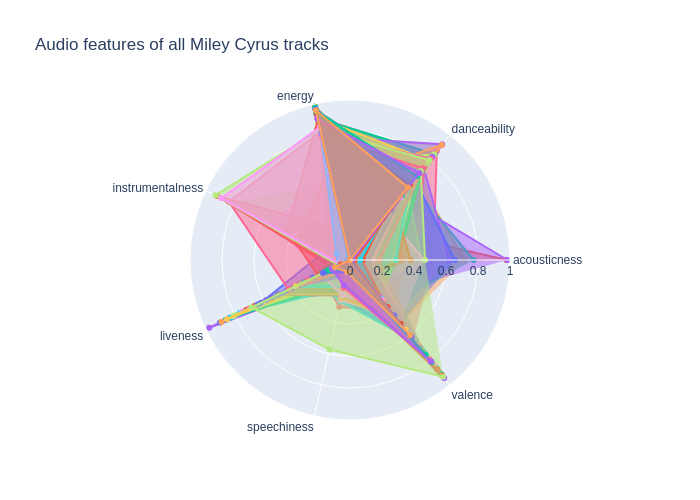

draw_audio_feature_of_all_songs_from_a_singer Jay Chou


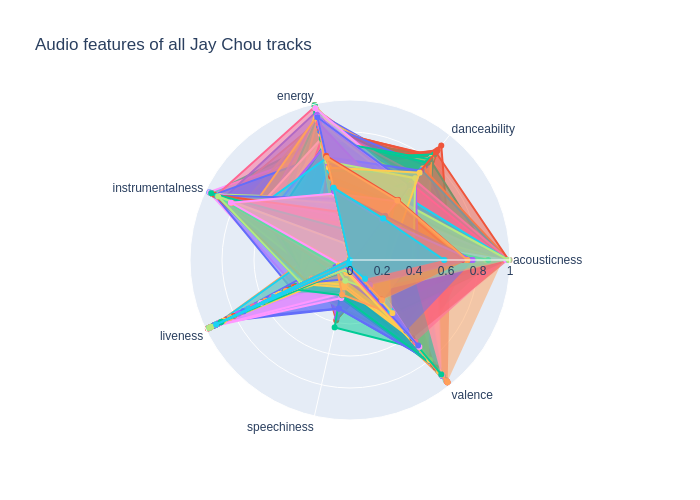

draw_audio_feature_of_all_songs_from_a_singer JJ Lin


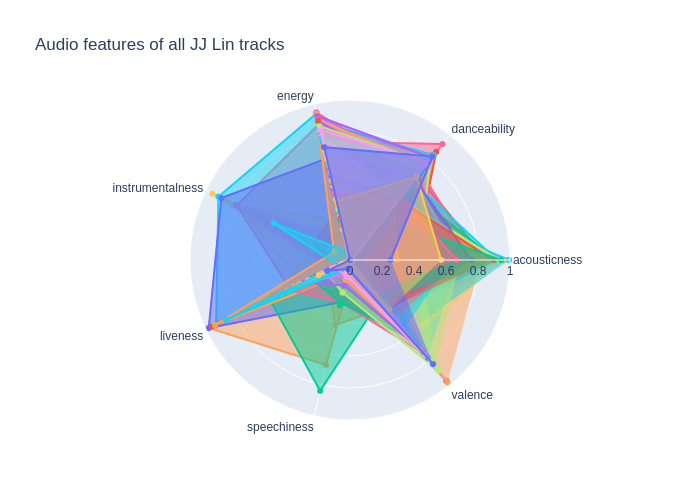

In [4]:
# audio features
def draw_audio_feature_of_all_songs_from_a_singer(singer: customdatatypes.Singer):
    print(f"draw_audio_feature_of_all_songs_from_a_singer {singer.name}")
    
    categories = [
        'acousticness',
        'danceability',
        'energy',
        'instrumentalness',
        'liveness',
        'speechiness',
        'valence'
    ]
    fig = go.Figure()

    for album in singer.albums:
        for track in album.tracks:
            fig.add_trace(go.Scatterpolar(
                r=[
                    track.acousticness,
                    track.danceability,
                    track.energy,
                    track.instrumentalness,
                    track.liveness,
                    track.speechiness,
                    track.valence
                ],
                theta=categories,
                fill='toself',
                name=f"{track.name}"
            ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )),
        showlegend=False
    )

    fig.update_layout(title_text=f"Audio features of all {singer.name} tracks")
    # fig.show()
    os.system(f"mkdir -p out/radar")
    fig.write_image(f"out/radar/{singer.name}.svg")
    
    # for jupyter, use png, due to performance reason
    fig.write_image(f"out/radar/{singer.name}.png")
    show_image(f"out/radar/{singer.name}.png")

def draw_audio_feature_of_all_albums_from_a_singer(singer: customdatatypes.Singer):
    print(f"draw_audio_feature_of_all_albums_from_a_singer {singer.name}")
    
    categories = [
        'acousticness',
        'danceability',
        'energy',
        'instrumentalness',
        'liveness',
        'speechiness',
        'valence'
    ]
    fig = go.Figure()

    for album in singer.albums:
        for track in album.tracks:
            fig.add_trace(go.Scatterpolar(
                r=[
                    track.acousticness,
                    track.danceability,
                    track.energy,
                    track.instrumentalness,
                    track.liveness,
                    track.speechiness,
                    track.valence
                ],
                theta=categories,
                fill='toself',
                name=f"{track.name}"
            ))

        print(f"draw_audio_feature_of_all_albums_from_a_singer {singer.name} {album.name}")
        fig.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[0, 1]
                )),
            showlegend=False
        )

        fig.update_layout(title_text=f"{singer.name} - {album.name}")
        # fig.show()
        os.system(f"mkdir -p \"out/{singer.name}\"")
        fig.write_image(f"out/{singer.name}/{album.name}.svg")
        
        # for jupyter, use png, due to performance reason
        fig.write_image(f"out/{singer.name}/{album.name}.svg")
        show_image(f"out/{singer.name}/{album.name}.svg")


for singer in english_singers:
    draw_audio_feature_of_all_songs_from_a_singer(singer=singer)
    # draw_audio_feature_of_all_albums_from_a_singer(singer=singer)

for singer in chinese_singers:
    draw_audio_feature_of_all_songs_from_a_singer(singer=singer)
    

draw_word_cloud_for_english_singer Taylor Swift


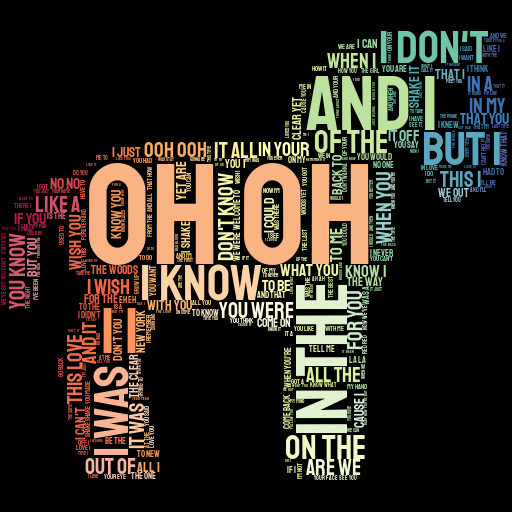

draw_word_cloud_for_english_singer Justin Bieber


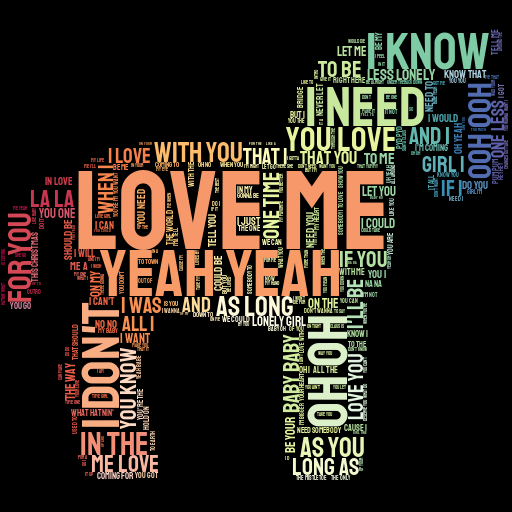

draw_word_cloud_for_english_singer Sia


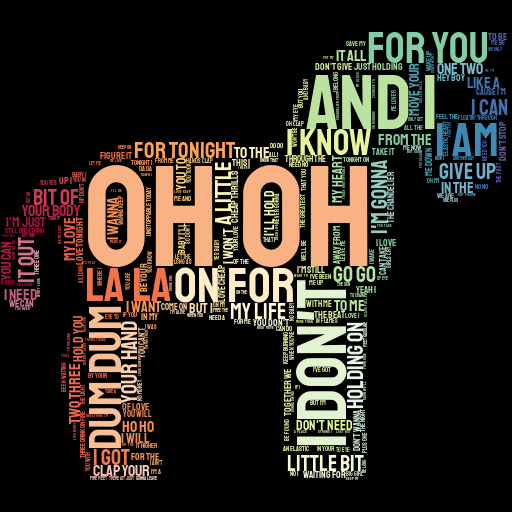

draw_word_cloud_for_english_singer Miley Cyrus


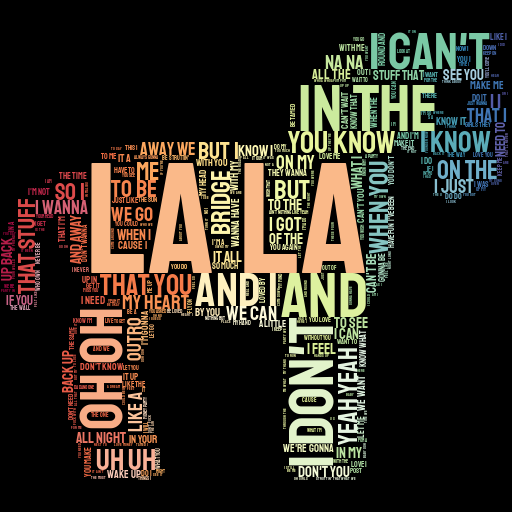

Building prefix dict from the default dictionary ...


draw_word_cloud_for_chinese_singer Jay Chou


Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.904 seconds.
Prefix dict has been built successfully.


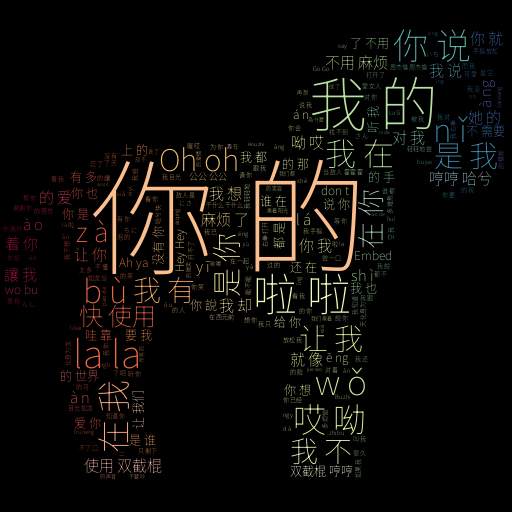

draw_word_cloud_for_chinese_singer JJ Lin


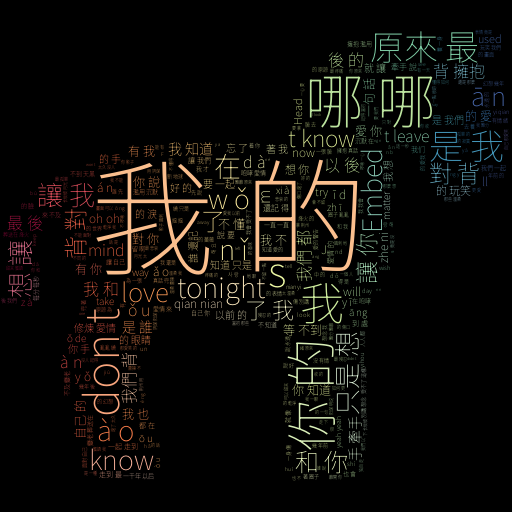

In [5]:
# word cloud
def draw_word_cloud_for_english_singer(singer: customdatatypes.Singer):
    print(f"draw_word_cloud_for_english_singer {singer.name}")
    
    text = ""
    for album in singer.albums:
        for track in album.tracks:
            if len(track.lyrics) > 0:
                text += " " + track.lyrics

    os.system(f"mkdir -p \"out/word_cloud\"")
    name_split = singer.name.split(" ")
    english_stop_words = ['verse', 'lyrics', 'chorus', 'pre']
    english_stop_words += name_split
    stylecloud.gen_stylecloud(text=text,
                                icon_name='fas fa-horse',
                                palette='colorbrewer.diverging.Spectral_11',
                                custom_stopwords=english_stop_words,
                                background_color='black',
                                gradient='horizontal',
                                output_name=f"out/word_cloud/{singer.name}.png")
    show_image(path=f"out/word_cloud/{singer.name}.png")

def draw_word_cloud_for_chinese_singer(singer: customdatatypes.Singer):
    # https://blog.csdn.net/qq_42374697/article/details/106269448
    print(f"draw_word_cloud_for_chinese_singer {singer.name}")
    
    text = ""
    for album in singer.albums:
        for track in album.tracks:
            if len(track.lyrics) > 0:
                # print(" ".join(jieba.cut(track.lyrics)))
                text += " " + " ".join(jieba.cut(track.lyrics))

    os.system(f"mkdir -p \"out/word_cloud\"")
    name_split = singer.name.split(" ")
    english_stop_words = ['verse', 'lyrics', 'chorus', 'pre']
    english_stop_words += name_split
    stylecloud.gen_stylecloud(text=text,
                                icon_name='fas fa-horse',
                                palette='colorbrewer.diverging.Spectral_11',
                                font_path='NotoSansCJKsc-VF.otf', # https://github.com/googlefonts/noto-cjk/tree/main/Sans
                                stopwords=True,
                                custom_stopwords=english_stop_words,
                                add_stopwords=True,
                                background_color='black',
                                gradient='horizontal',
                                output_name=f"out/word_cloud/{singer.name}.png")
    show_image(path=f"out/word_cloud/{singer.name}.png")
    
for singer in english_singers:
    draw_word_cloud_for_english_singer(singer=singer)

for singer in chinese_singers:
    draw_word_cloud_for_chinese_singer(singer=singer)


draw_audio_feature_change_over_time Taylor Swift


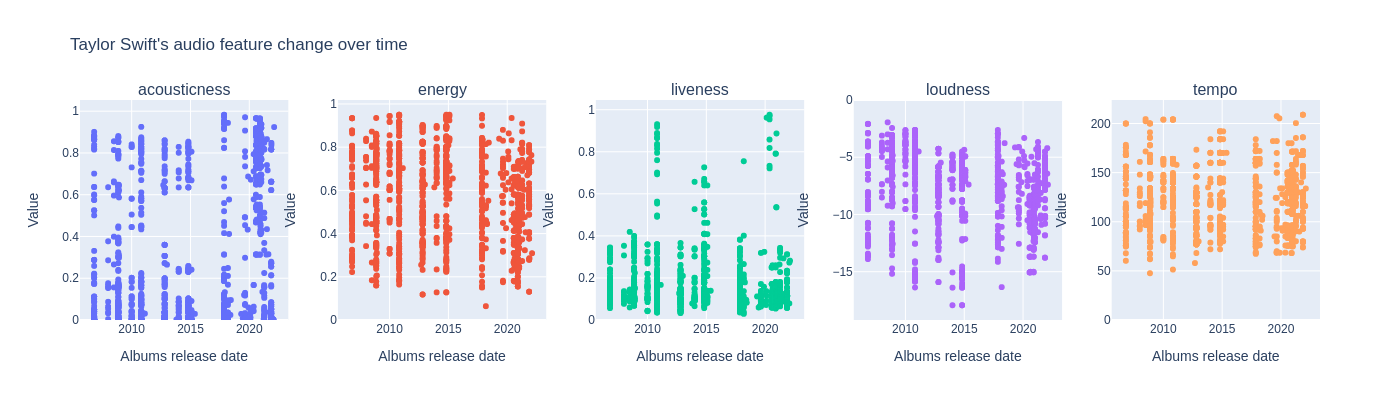

draw_audio_feature_change_over_time Justin Bieber


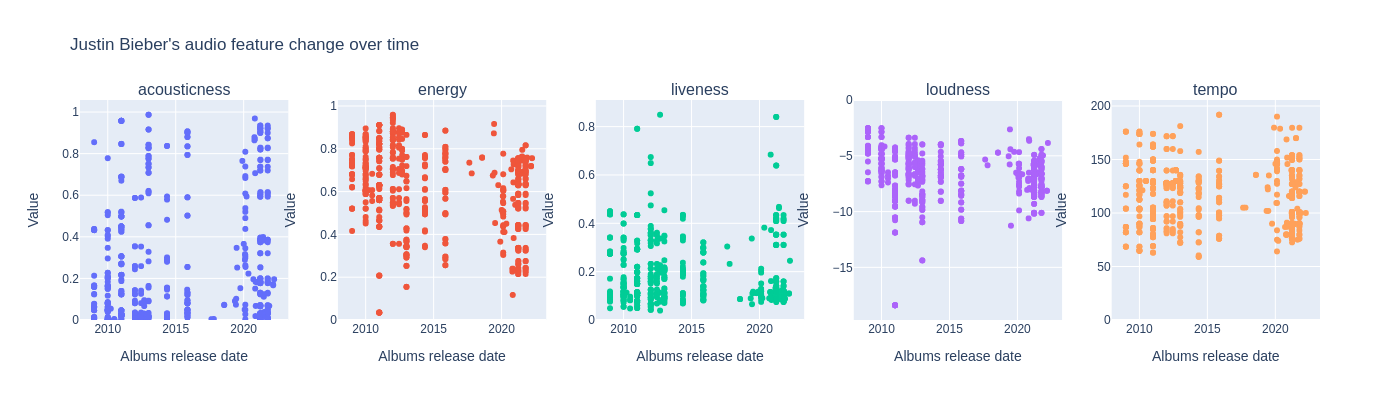

draw_audio_feature_change_over_time Sia


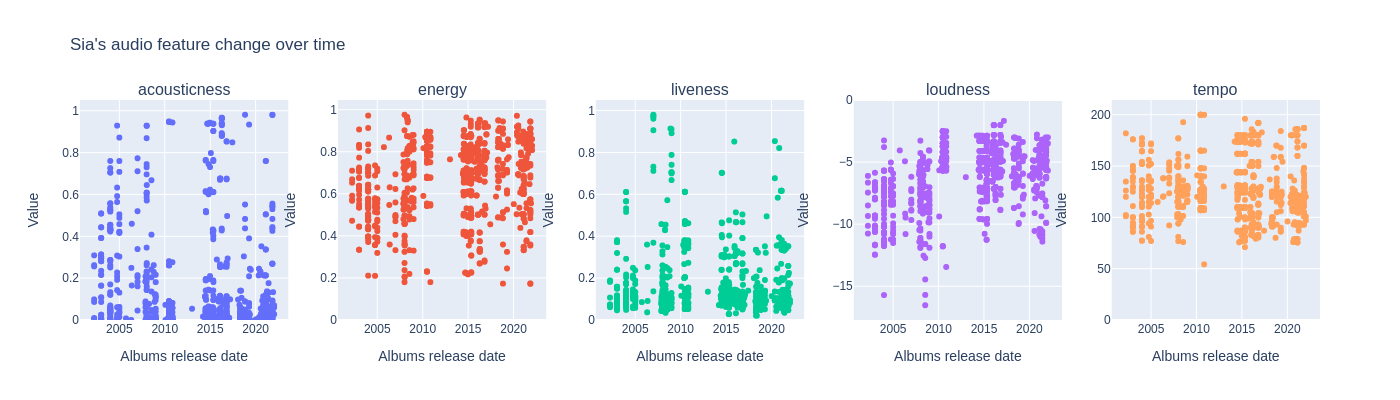

draw_audio_feature_change_over_time Miley Cyrus


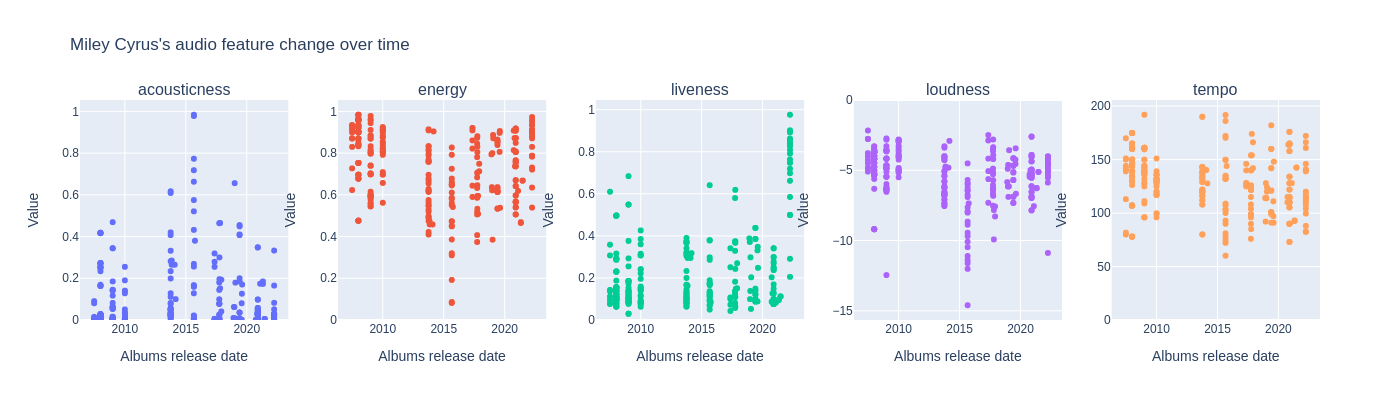

draw_audio_feature_change_over_time Jay Chou


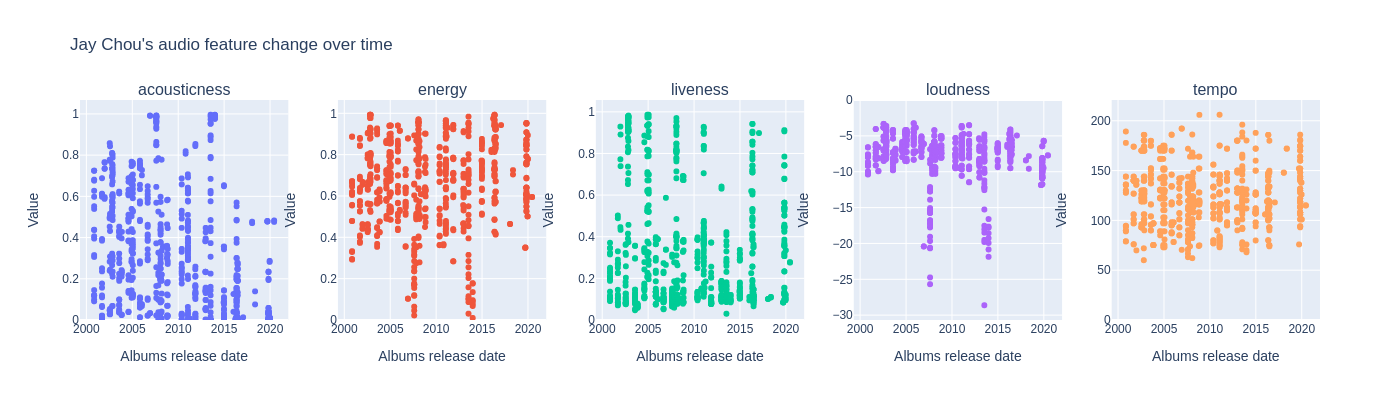

draw_audio_feature_change_over_time JJ Lin


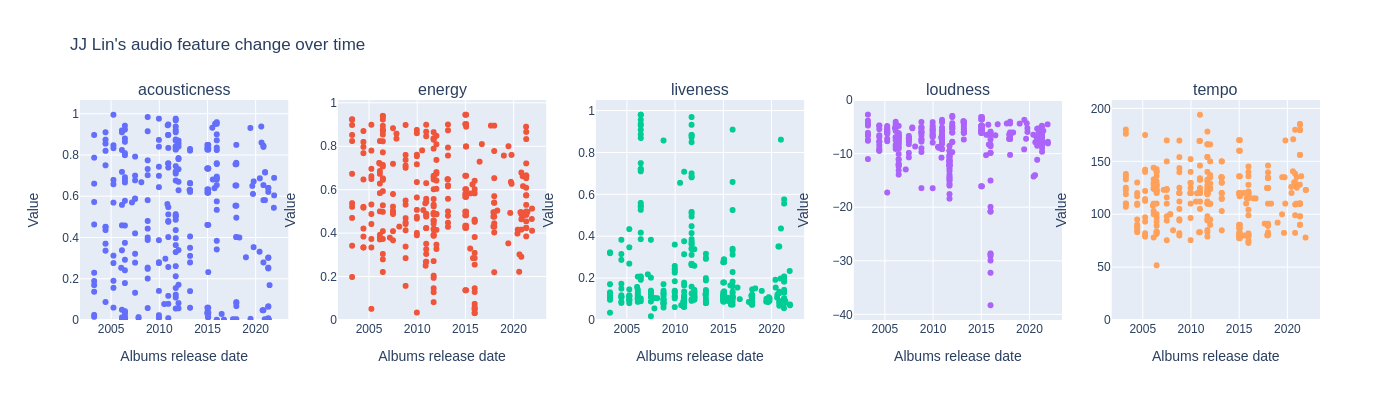

In [54]:
# audio feature changes over time for a singer
def draw_audio_feature_change_over_time(singer: customdatatypes.Singer):
    print(f"draw_audio_feature_change_over_time {singer.name}")
    
    fig = make_subplots(rows=1, cols=5, subplot_titles=('acousticness', 'energy', 'liveness', 'loudness', 'tempo'))
    
    x = []
    y = []
    for (i, album) in enumerate(singer.albums):
        for track in album.tracks:
            x.append(album.release_date)
            y.append(track.acousticness)
    
    fig.add_trace(go.Scatter(x=x, y=y, mode="markers+text", showlegend=False), row=1, col=1)
    fig.update_xaxes(title="Albums release date", row=1, col=1, rangemode="tozero")
    fig.update_yaxes(title="Value", row=1, col=1, rangemode="tozero")
    
    x = []
    y = []
    for (i, album) in enumerate(singer.albums):
        for track in album.tracks:
            x.append(album.release_date)
            y.append(track.energy)
    
    fig.add_trace(go.Scatter(x=x, y=y, mode="markers+text", showlegend=False), row=1, col=2)
    fig.update_xaxes(title="Albums release date", row=1, col=2, rangemode="tozero")
    fig.update_yaxes(title="Value", row=1, col=2, rangemode="tozero")
    
    x = []
    y = []
    for (i, album) in enumerate(singer.albums):
        for track in album.tracks:
            x.append(album.release_date)
            y.append(track.liveness)
    
    fig.add_trace(go.Scatter(x=x, y=y, mode="markers+text", showlegend=False), row=1, col=3)
    fig.update_xaxes(title="Albums release date", row=1, col=3, rangemode="tozero")
    fig.update_yaxes(title="Value", row=1, col=3, rangemode="tozero")
    
    x = []
    y = []
    for (i, album) in enumerate(singer.albums):
        for track in album.tracks:
            x.append(album.release_date)
            y.append(track.loudness)
    
    fig.add_trace(go.Scatter(x=x, y=y, mode="markers+text", showlegend=False), row=1, col=4)
    fig.update_xaxes(title="Albums release date", row=1, col=4, rangemode="tozero")
    fig.update_yaxes(title="Value", row=1, col=4, rangemode="tozero")
    
    x = []
    y = []
    for (i, album) in enumerate(singer.albums):
        for track in album.tracks:
            x.append(album.release_date)
            y.append(track.tempo)
    
    fig.add_trace(go.Scatter(x=x, y=y, mode="markers+text", showlegend=False), row=1, col=5)
    fig.update_xaxes(title="Albums release date", row=1, col=5, rangemode="tozero")
    fig.update_yaxes(title="Value", row=1, col=5, rangemode="tozero")
    
    fig.update_layout(height=400, width=1400, title_text=f"{singer.name}'s audio feature change over time")
    
    # fig.show() # will have weird bug during rendering
    os.system(f"mkdir -p \"out/audio_feature\"")
    fig.write_image(f"out/audio_feature/{singer.name}.png")
    show_image(f"out/audio_feature/{singer.name}.png")

for singer in english_singers+chinese_singers:
    draw_audio_feature_change_over_time(singer=singer)